# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [275]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
# !pip install gdown
# !gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

## Importing Libraries

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [277]:
df = pd.read_csv("Bus_Breakdown_and_Delays.csv")

In [278]:
# inspection
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [279]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [280]:
df.shape

(147972, 21)

In [281]:
#dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [282]:
# extracting categorical
categorical = ['Run_Type', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On',
      'Breakdown_or_Running_Late', 'School_Age_or_PreK']

In [283]:
# furthure inspection
df.columns
for i in categorical :
  print(i)
  print(df[i].unique())
  print(df[i].nunique())

Run_Type
['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
10
Route_Number
['1' '2' 'P640' ... '012' '29AM' '1409B']
11283
Reason
['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]
10
Schools_Serviced
['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']
5180
Boro
['Bronx' nan 'Queens' 'Brooklyn' 'Nassau County' 'Manhattan' 'Westchester'
 'Staten Island' 'All Boroughs' 'Rockland County' 'Connecticut'
 'New Jersey']
11
Bus_Company_Name
['G.V.C., LTD.' 'ACME BUS CORP. (B2321)' 'LORINDA ENT. LTD.'
 'L & M BUS CORP.' 'BORO TRANSIT, INC.' 'NEW DAWN TRANSIT, LLC (B2'
 'LOGAN BUS COMPANY INC.' 'HAPPY CHILD TRANS LLC (B2'
 'BOBBY`S BUS CO. INC.' 'LEESEL TRANSP CORP (B2192' 'SNT BUS INC'
 'M

In [284]:
# summary statistics
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [285]:
# checking null values
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [286]:
numeric_val = df.select_dtypes(include="number")

In [287]:
# correlation
corr = numeric_val.corr()

<Axes: >

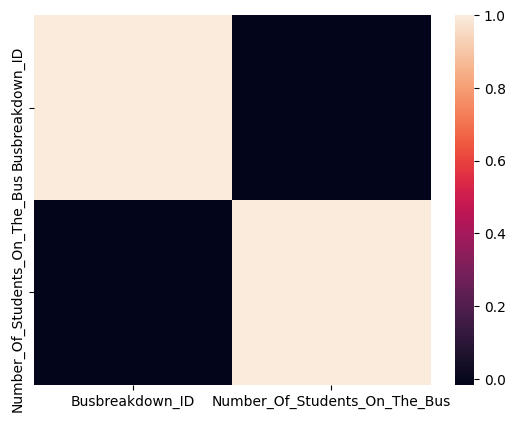

In [288]:
sns.heatmap(corr)

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [289]:
# handle missing vals
df.shape

(147972, 21)

In [290]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [291]:
# before handling missing vals i'll drop the identifications and dates since it's add no value to the training part
# I'll only leave Bus_Company_Name since it's maybe concerns with the quality of the bus they provide
df.drop(["School_Year", "Busbreakdown_ID", "Bus_No", "Schools_Serviced","Occurred_On","Created_On", "How_Long_Delayed", "Incident_Number","Informed_On", "Last_Updated_On"],  axis=1, inplace = True)

In [292]:
df.isnull().sum()

,0
Run_Type,89
Route_Number,88
Reason,102
Boro,6318
Bus_Company_Name,0
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0
Has_Contractor_Notified_Parents,0
Have_You_Alerted_OPT,0
Breakdown_or_Running_Late,0


In [293]:
df["Boro"].fillna(df["Boro"].mode()[0], inplace=True)

In [294]:
df.isnull().sum()

,0
Run_Type,89
Route_Number,88
Reason,102
Boro,0
Bus_Company_Name,0
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0
Has_Contractor_Notified_Parents,0
Have_You_Alerted_OPT,0
Breakdown_or_Running_Late,0


In [295]:
df.dropna(inplace=True)

In [296]:
df.isnull().sum()

,0
Run_Type,0
Route_Number,0
Reason,0
Boro,0
Bus_Company_Name,0
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0
Has_Contractor_Notified_Parents,0
Have_You_Alerted_OPT,0
Breakdown_or_Running_Late,0


In [297]:
df.shape

(147693, 11)

In [298]:
df

,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,Pre-K/EI,1,Other,Bronx,"G.V.C., LTD.",5,Yes,Yes,No,Running Late,Pre-K
1,Pre-K/EI,1,Heavy Traffic,Bronx,"G.V.C., LTD.",3,Yes,Yes,No,Running Late,Pre-K
2,Pre-K/EI,2,Heavy Traffic,Bronx,"G.V.C., LTD.",12,Yes,Yes,Yes,Running Late,Pre-K
3,Pre-K/EI,2,Other,Bronx,"G.V.C., LTD.",11,Yes,Yes,Yes,Running Late,Pre-K
4,Pre-K/EI,2,Other,Bronx,"G.V.C., LTD.",12,Yes,Yes,No,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...
147967,Pre-K/EI,2,Heavy Traffic,Bronx,"G.V.C., LTD.",7,Yes,Yes,No,Running Late,Pre-K
147968,Pre-K/EI,5,Heavy Traffic,Bronx,"G.V.C., LTD.",0,Yes,Yes,No,Running Late,Pre-K
147969,Special Ed PM Run,X928,Heavy Traffic,Bronx,G.V.C. LTD. (B2192),0,Yes,Yes,Yes,Running Late,School-Age
147970,Special Ed PM Run,Q920,Won`t Start,Queens,LITTLE RICHIE BUS SERVICE,0,Yes,Yes,No,Breakdown,School-Age


###Encode Categorical Variables

In [299]:
print(df["Has_Contractor_Notified_Schools"].nunique())
print(df["Has_Contractor_Notified_Parents"].nunique())
print(df["Have_You_Alerted_OPT"].nunique())

2
2
2


In [300]:
df["Has_Contractor_Notified_Schools"].replace("Yes", True, inplace=True)
df["Has_Contractor_Notified_Schools"].replace("No", False, inplace= True)
df["Has_Contractor_Notified_Parents"].replace("Yes", True, inplace=True)
df["Has_Contractor_Notified_Parents"].replace("No", False, inplace=True)
df["Have_You_Alerted_OPT"].replace("Yes", True, inplace=True)
df["Have_You_Alerted_OPT"].replace("No", False, inplace=True)

In [301]:
df["Breakdown_or_Running_Late"].unique()

array(['Running Late', 'Breakdown'], dtype=object)

In [302]:
df["School_Age_or_PreK"].unique()

array(['Pre-K', 'School-Age'], dtype=object)

In [303]:
df["Breakdown_or_Running_Late"].replace('Running Late', True, inplace=True)
df["Breakdown_or_Running_Late"].replace('Breakdown', False, inplace=True)

In [304]:
df["School_Age_or_PreK"].unique()

array(['Pre-K', 'School-Age'], dtype=object)

In [305]:
df["School_Age_or_PreK"].replace('School-Age', True, inplace=True)
df["School_Age_or_PreK"].replace('Pre-K', False, inplace=True)
df["Number_Of_Students_On_The_Bus"] = df["Number_Of_Students_On_The_Bus"].astype(float)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147693 entries, 0 to 147971
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Run_Type                         147693 non-null  object 
 1   Route_Number                     147693 non-null  object 
 2   Reason                           147693 non-null  object 
 3   Boro                             147693 non-null  object 
 4   Bus_Company_Name                 147693 non-null  object 
 5   Number_Of_Students_On_The_Bus    147693 non-null  float64
 6   Has_Contractor_Notified_Schools  147693 non-null  bool   
 7   Has_Contractor_Notified_Parents  147693 non-null  bool   
 8   Have_You_Alerted_OPT             147693 non-null  bool   
 9   Breakdown_or_Running_Late        147693 non-null  bool   
 10  School_Age_or_PreK               147693 non-null  bool   
dtypes: bool(5), float64(1), object(5)
memory usage: 8.6+ MB


In [307]:
enc = pd.get_dummies(df[['Run_Type','Route_Number' , 'Reason','Boro', 'Bus_Company_Name']], prefix=['Run_Type', 'Route_Number' ,'Reason','Boro', 'Bus_Company_Name'])

In [308]:
df_encoded = pd.concat([df.drop(['Run_Type','Reason', 'Route_Number','Boro','Bus_Company_Name'], axis=1), enc], axis=1)

In [309]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147693 entries, 0 to 147971
Columns: 11405 entries, Number_Of_Students_On_The_Bus to Bus_Company_Name_phillip bus service
dtypes: bool(11404), float64(1)
memory usage: 1.6 GB


In [310]:
df_encoded

,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK,Run_Type_General Ed AM Run,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,...,"Bus_Company_Name_THOMAS BUSES, INC. (B2321",Bus_Company_Name_TWENTY FIRST AV TRANSP (B,Bus_Company_Name_VAN TRANS LLC,Bus_Company_Name_VAN TRANS LLC (B2192),Bus_Company_Name_VINNY`S BUS SERVICES (B23,Bus_Company_Name_Y & M TRANSIT CORP (B2192,Bus_Company_Name_Y & M TRANSIT CORP (B2192),Bus_Company_Name_Y & M TRANSIT CORP (B2321,Bus_Company_Name_alina,Bus_Company_Name_phillip bus service
0,5.0,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,3.0,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,12.0,True,True,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,11.0,True,True,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,12.0,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,7.0,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
147968,0.0,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
147969,0.0,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147970,0.0,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [311]:
y = df_encoded['Breakdown_or_Running_Late']
X = df_encoded.drop('Breakdown_or_Running_Late', axis=1)

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [313]:
X.shape

(147693, 11404)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [314]:
import tensorflow as tf

  # tf.keras.layers.Flatten(input_shape=(28, 28)),
  # tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  # tf.keras.layers.Dense(10, activation='softmax')

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu' , input_dim = 11404),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [315]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 32)                  │         364,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 386,273 (1.47 MB)

 Trainable params: 386,273 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [316]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

## Training the Model
Train the ANN model using the training data.

In [317]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_split=0.2, callbacks=[callback])

Epoch 1/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9324 - loss: 0.1845 - val_accuracy: 0.9502 - val_loss: 0.1218
Epoch 2/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9589 - loss: 0.1171 - val_accuracy: 0.9487 - val_loss: 0.1257
Epoch 3/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9679 - loss: 0.0867 - val_accuracy: 0.9476 - val_loss: 0.1366
Epoch 4/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9736 - loss: 0.0702 - val_accuracy: 0.9448 - val_loss: 0.1767
Epoch 5/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9777 - loss: 0.0567 - val_accuracy: 0.9424 - val_loss: 0.1657


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [318]:
model.evaluate(X_test, y_test)

924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9410 - loss: 0.1742


[0.16331368684768677, 0.9428890347480774]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [330]:
model.predict(X_test)

924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.9999989 ],
       [0.9982393 ],
       [0.99998665],
       ...,
       [0.9999368 ],
       [0.9999994 ],
       [0.9993149 ]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

TypeError: unhashable type: 'dict'

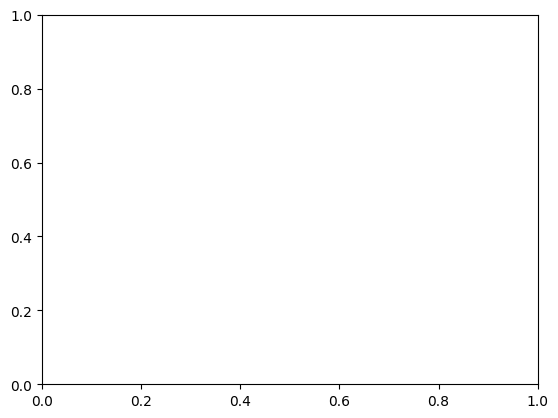

In [332]:
plt.plot(history.history)

## Save the Model
Save the trained model for submission.

In [338]:
model.save("To_save.keras")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: